# Tugas Besar 2 - Regression

<p>Dibuat oleh:</p>

William Rukmansa - 13516066 <br>
Bella Destiana Junaidi - 13516070 <br>
Kevin Andrian Liwinata - 13516118 <br>
Nuha Adinata - 13516120

## 1. Import Data Hasil Web Crawling

In [490]:
import copy
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [491]:
# Buka file CSV dan dijadikan Dataframe
file = 'data5.csv'
data = pd.read_csv(file)
data.head(29)

BahanBakar                                      FiturTambahan  \
0      Bensin                                    Electric Window   
1      Bensin  Jok kulit,Bluetooth Audio,Electric Window,Sens...   
2      Bensin  Jok kulit,Bluetooth Audio,Electric Window,Sens...   
3      Bensin                                                NaN   
4      Bensin  Jok kulit,Bluetooth Audio,Electric Window,Sens...   
5      Bensin                                    Electric Window   
6      Bensin                                    Electric Window   
7      Bensin                                                NaN   
8      Bensin                                    Electric Window   
9      Bensin                                    Electric Window   
10     Bensin  Airbag,Bluetooth Audio,Electric Window,Jok kul...   
11     Bensin                                                NaN   
12     Bensin  Airbag,Bluetooth Audio,Electric Window,Sensor ...   
13     Bensin  Airbag,Bluetooth Audio,Electric Window,Jok kul...   
14     Bensin  Jok kulit,Bluetooth Audio,Electric Window,Sens...   
15     Bensin  Electric Window,Airbag,Sensor Parkir,Bluetooth...   
16     Bensin  Electric Window,Bluetooth Audio,Airbag,Sensor ...   
17     Bensin                                                NaN   
18     Bensin  Airbag,Bluetooth Audio,Electric Window,Kamera ...   
19     Bensin  Airbag,Bluetooth Audio,Electric Window,Kamera ...   
20     Bensin                                    Electric Window   
21     Bensin                                    Electric Window   
22     Bensin               Sensor Parkir,Airbag,Electric Window   
23     Bensin  Bluetooth Audio,Electric Window,Kamera Belakan...   
24     Bensin     Bluetooth Audio,Jok kulit,Sensor Parkir,Airbag   
25     Bensin               Airbag,Electric Window,Sensor Parkir   
26     Bensin                                                NaN   
27     Bensin  Electric Window,Airbag,Sensor Parkir,Bluetooth...   
28     Diesel  Airbag,Bluetooth Audio,Electric Window,Sensor ...   

             Harga         JarakTempuh     KapasitasMesin  \
0    Rp 30.000.000  160.000-165.000 km  >1.000 - 1.500 cc   
1    Rp 37.000.000  230.000-235.000 km  >1.000 - 1.500 cc   
2    Rp 37.000.000  230.000-235.000 km  >1.000 - 1.500 cc   
3    Rp 55.000.000    85.000-90.000 km          <1.000 cc   
4    Rp 37.000.000  230.000-235.000 km  >1.000 - 1.500 cc   
5    Rp 30.000.000  160.000-165.000 km  >1.000 - 1.500 cc   
6    Rp 30.000.000  160.000-165.000 km  >1.000 - 1.500 cc   
7    Rp 55.000.000    85.000-90.000 km          <1.000 cc   
8    Rp 30.000.000  160.000-165.000 km  >1.000 - 1.500 cc   
9    Rp 30.000.000  160.000-165.000 km  >1.000 - 1.500 cc   
10  Rp 153.000.000  105.000-110.000 km  >1.000 - 1.500 cc   
11  Rp 232.000.000    20.000-25.000 km  >1.000 - 1.500 cc   
12  Rp 225.000.000    30.000-35.000 km  >1.500 - 2.000 cc   
13   Rp 95.500.000    50.000-55.000 km  >1.500 - 2.000 cc   
14   Rp 37.000.000  230.000-235.000 km  >1.000 - 1.500 cc   
15  Rp 122.000.000  180.000-185.000 km  >1.000 - 1.500 cc   
16   Rp 85.500.000         >300.000 km  >1.000 - 1.500 cc   
17   Rp 55.000.000    80.000-85.000 km                NaN   
18  Rp 132.000.000  125.000-130.000 km  >1.000 - 1.500 cc   
19  Rp 179.000.000    25.000-30.000 km  >1.000 - 1.500 cc   
20   Rp 85.000.000    40.000-45.000 km          <1.000 cc   
21   Rp 30.000.000  160.000-165.000 km  >1.000 - 1.500 cc   
22  Rp 130.000.000    25.000-30.000 km  >1.000 - 1.500 cc   
23   Rp 95.000.000    30.000-35.000 km  >1.000 - 1.500 cc   
24  Rp 129.000.000    50.000-55.000 km  >1.000 - 1.500 cc   
25  Rp 160.000.000    45.000-50.000 km  >1.000 - 1.500 cc   
26   Rp 55.000.000    85.000-90.000 km          <1.000 cc   
27  Rp 122.000.000  180.000-185.000 km  >1.000 - 1.500 cc   
28  Rp 280.000.000    90.000-95.000 km  >2.000 - 3.000 cc   

                                               Lokasi     Merek     Model  \
0   Wundulako, Kolaka Kab., Sulawesi Tenggara,Wund... 

## 2. Exploratory Data Analysis

### 2.1. Sebelum menghilangkan duplikat

In [492]:
data.duplicated(keep='first').value_counts()

True     221203
False     15111
dtype: int64

In [493]:
pd.set_option('display.max_columns', 21)
data.describe()

BahanBakar FiturTambahan           Harga JarakTempuh  \
count      233192        160970          233192      233192   
unique          4          1226            1410          61   
top        Bensin     Jok kulit  Rp 125.000.000  0-5.000 km   
freq       205152          9720            4753       12754   

           KapasitasMesin                                             Lokasi  \
count              201459                                             233192   
unique                  5                                                889   
top     >1.000 - 1.500 cc  Pademangan, Jakarta Utara, Jakarta D.K.I.,Pade...   
freq               105022                                               6794   

         Merek   Model         NamaBursaMobil NamaPenjual SistemPenggerak  \
count   233192  233192                  31601      233192          183641   
unique      49     356                     21        5549               5   
top     Toyota  Avanza  Bursa Otomotif Sunter    OLX User             4X2   
freq     76735   16383                   5284        4556           83197   

         Tahun TanggalAnggota TanggalJual TipeBodi TipePenjual Transmisi  \
count   233192         233192      233192   198618      187150    233192   
unique      35            144         112       18           2         3   
top       2016       Hari ini    Hari ini  Minibus    Individu    Manual   
freq     24482          13400      179424    46250      133812    118704   

                                                      Url     Varian   Warna  \
count                                              236313     223853  233192   
unique                                              12584        608      14   
top     https://www.olx.co.id/item/mobil-daihatsu-ayla...  Lain-lain   Hitam   
freq                                                  538      38309   62863   

       dihighlight  
count        60343  
unique           1  
top      Highlight  
freq         60343

In [494]:
for column in data.columns:
    print(data[column].describe())
    print("\n")

count     233192
unique         4
top       Bensin
freq      205152
Name: BahanBakar, dtype: object


count        160970
unique         1226
top       Jok kulit
freq           9720
Name: FiturTambahan, dtype: object


count             233192
unique              1410
top       Rp 125.000.000
freq                4753
Name: Harga, dtype: object


count         233192
unique            61
top       0-5.000 km
freq           12754
Name: JarakTempuh, dtype: object


count                201459
unique                    5
top       >1.000 - 1.500 cc
freq                 105022
Name: KapasitasMesin, dtype: object


count                                                233192
unique                                                  889
top       Pademangan, Jakarta Utara, Jakarta D.K.I.,Pade...
freq                                                   6794
Name: Lokasi, dtype: object


count     233192
unique        49
top       Toyota
freq       76735
Name: Merek, dtype: object


count     233192

In [495]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236314 entries, 0 to 236313
Data columns (total 21 columns):
BahanBakar         233192 non-null object
FiturTambahan      160970 non-null object
Harga              233192 non-null object
JarakTempuh        233192 non-null object
KapasitasMesin     201459 non-null object
Lokasi             233192 non-null object
Merek              233192 non-null object
Model              233192 non-null object
NamaBursaMobil     31601 non-null object
NamaPenjual        233192 non-null object
SistemPenggerak    183641 non-null object
Tahun              233192 non-null object
TanggalAnggota     233192 non-null object
TanggalJual        233192 non-null object
TipeBodi           198618 non-null object
TipePenjual        187150 non-null object
Transmisi          233192 non-null object
Url                236313 non-null object
Varian             223853 non-null object
Warna              233192 non-null object
dihighlight        60343 non-null object
dtypes: o

In [496]:
data.BahanBakar.unique()

array(['Bensin', 'Diesel', 'Hybrid', nan, 'Listrik'], dtype=object)

In [497]:
data.KapasitasMesin.unique()

array(['>1.000 - 1.500 cc', '<1.000 cc', '>1.500 - 2.000 cc', nan,
       '>2.000 - 3.000 cc', '>3.000 cc'], dtype=object)

In [498]:
data.TipePenjual.unique()

array(['Individu', nan, 'Diler'], dtype=object)

In [499]:
data.Transmisi.unique()

array(['Manual', 'Automatic Triptonic', 'Automatic', nan], dtype=object)

In [500]:
data.SistemPenggerak.unique()

array(['Front Wheel Drive (FWD)', '4X2', nan, 'All Wheel Drive (AWD)',
       'Rear Wheel Drive (RWD)', '4X4'], dtype=object)

### 2.2. Setelah Menghilangkan Duplikat

In [501]:
data = data.drop_duplicates(subset=None, keep='first', inplace=False)
data = data.reset_index(drop=True)
data.head()

BahanBakar                                      FiturTambahan  \
0     Bensin                                    Electric Window   
1     Bensin  Jok kulit,Bluetooth Audio,Electric Window,Sens...   
2     Bensin                                                NaN   
3     Bensin  Airbag,Bluetooth Audio,Electric Window,Jok kul...   
4     Bensin                                                NaN   

            Harga         JarakTempuh     KapasitasMesin  \
0   Rp 30.000.000  160.000-165.000 km  >1.000 - 1.500 cc   
1   Rp 37.000.000  230.000-235.000 km  >1.000 - 1.500 cc   
2   Rp 55.000.000    85.000-90.000 km          <1.000 cc   
3  Rp 153.000.000  105.000-110.000 km  >1.000 - 1.500 cc   
4  Rp 232.000.000    20.000-25.000 km  >1.000 - 1.500 cc   

                                              Lokasi     Merek    Model  \
0  Wundulako, Kolaka Kab., Sulawesi Tenggara,Wund...     Chery       QQ   
1  Pekanbaru Kota, Pekanbaru Kota, Riau,Pekanbaru...    Toyota  Starlet   
2  Girimulyo, Kulon Progo Kab., Yogyakarta D.I.,G...  Daihatsu    Xenia   
3  Ilir Barat I, Palembang Kota, Sumatra Selatan,...     Honda     Jazz   
4  Wonokromo, Surabaya Kota, Jawa Timur,Wonokromo...     Honda     HR-V   

  NamaBursaMobil     NamaPenjual          SistemPenggerak Tahun  \
0            NaN           Sadri  Front Wheel Drive (FWD)  2009   
1            NaN  tianaramadhani                      4X2  1994   
2            NaN          psedre                      NaN  2008   
3            NaN  Yoga mobilindo  Front Wheel Drive (FWD)  2014   
4            NaN           sisca                      NaN  2015   

  TanggalAnggota TanggalJual            TipeBodi TipePenjual  \
0       Jun 2015    Hari ini  Compact & City Car    Individu   
1        Kemarin    Hari ini               Sedan    Individu   
2       Hari ini    Hari ini             Minibus         NaN   
3       Jun 2018      27 Okt  Compact & City Car         NaN   
4       Apr 2018       4 Okt                 NaN    Individu   

             Transmisi                                                Url  \
0               Manual  https://www.olx.co.id/item/chery-qq-11-tahun-2...   
1               Manual  https://www.olx.co.id/item/dijual-mobil-toyota...   
2               Manual  https://www.olx.co.id/item/daihatsu-xenia-li-d...   
3               Manual  https://www.olx.co.id/item/honda-jazz-rs-2014-...   
4  Automatic Triptonic  https://www.olx.co.id/item/honda-hrv-e-cvt-201...   

         Varian    Warna dihighlight  
0  Compact City    Merah         NaN  
1     Lain-lain  Abu-abu         NaN  
2     Li Deluxe    Hitam         NaN  
3            RS     Biru   Highlight  
4         E CVT  Abu-abu   Highlight

In [502]:
data.describe()

BahanBakar                                      FiturTambahan  \
count       14951                                              10235   
unique          4                                               1226   
top        Bensin  Airbag,Bluetooth Audio,Electric Window,Sensor ...   
freq        13128                                                544   

                 Harga JarakTempuh     KapasitasMesin  \
count            14951       14951              12372   
unique            1410          61                  5   
top     Rp 125.000.000  0-5.000 km  >1.000 - 1.500 cc   
freq               266        1561               6056   

                                                   Lokasi   Merek   Model  \
count                                               14951   14951   14951   
unique                                                889      49     356   
top     Pademangan, Jakarta Utara, Jakarta D.K.I.,Pade...  Toyota  Innova   
freq                                                  721    4852     997   

                    NamaBursaMobil NamaPenjual SistemPenggerak  Tahun  \
count                         2436       14951           11179  14951   
unique                          21        5549               5     35   
top     Bursa Mobil WTC Mangga Dua    OLX User             4X2   2014   
freq                           536         142            5329   1602   

       TanggalAnggota TanggalJual TipeBodi TipePenjual  Transmisi  \
count           14951       14951    11943       11264      14951   
unique            144         112       18           2          3   
top          Okt 2019    Hari ini      MPV    Individu  Automatic   
freq              526        2375     2735        6465       6718   

                                                      Url     Varian  Warna  \
count                                               15110      13578  14951   
unique                                              12584        608     14   
top     https://www.olx.co.id/item/l-300-minibus-bensi...  Lain-lain  Hitam   
freq                                                    3       1789   4389   

       dihighlight  
count        12412  
unique           1  
top      Highlight  
freq         12412

In [503]:
for column in data.columns:
    print(data[column].describe())
    print("\n")

count      14951
unique         4
top       Bensin
freq       13128
Name: BahanBakar, dtype: object


count                                                 10235
unique                                                 1226
top       Airbag,Bluetooth Audio,Electric Window,Sensor ...
freq                                                    544
Name: FiturTambahan, dtype: object


count              14951
unique              1410
top       Rp 125.000.000
freq                 266
Name: Harga, dtype: object


count          14951
unique            61
top       0-5.000 km
freq            1561
Name: JarakTempuh, dtype: object


count                 12372
unique                    5
top       >1.000 - 1.500 cc
freq                   6056
Name: KapasitasMesin, dtype: object


count                                                 14951
unique                                                  889
top       Pademangan, Jakarta Utara, Jakarta D.K.I.,Pade...
freq                                       

In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15111 entries, 0 to 15110
Data columns (total 21 columns):
BahanBakar         14951 non-null object
FiturTambahan      10235 non-null object
Harga              14951 non-null object
JarakTempuh        14951 non-null object
KapasitasMesin     12372 non-null object
Lokasi             14951 non-null object
Merek              14951 non-null object
Model              14951 non-null object
NamaBursaMobil     2436 non-null object
NamaPenjual        14951 non-null object
SistemPenggerak    11179 non-null object
Tahun              14951 non-null object
TanggalAnggota     14951 non-null object
TanggalJual        14951 non-null object
TipeBodi           11943 non-null object
TipePenjual        11264 non-null object
Transmisi          14951 non-null object
Url                15110 non-null object
Varian             13578 non-null object
Warna              14951 non-null object
dihighlight        12412 non-null object
dtypes: object(21)
memory usage

In [505]:
data.BahanBakar.unique()

array(['Bensin', 'Diesel', 'Hybrid', nan, 'Listrik'], dtype=object)

In [506]:
data.KapasitasMesin.unique()

array(['>1.000 - 1.500 cc', '<1.000 cc', '>1.500 - 2.000 cc', nan,
       '>2.000 - 3.000 cc', '>3.000 cc'], dtype=object)

In [507]:
data.TipePenjual.unique()

array(['Individu', nan, 'Diler'], dtype=object)

In [508]:
data.Transmisi.unique()

array(['Manual', 'Automatic Triptonic', 'Automatic', nan], dtype=object)

In [509]:
data.SistemPenggerak.unique()

array(['Front Wheel Drive (FWD)', '4X2', nan, 'All Wheel Drive (AWD)',
       'Rear Wheel Drive (RWD)', '4X4'], dtype=object)

In [510]:
data = data.dropna(thresh=2)
data = data.reset_index(drop=True)
data

BahanBakar                                      FiturTambahan  \
0         Bensin                                    Electric Window   
1         Bensin  Jok kulit,Bluetooth Audio,Electric Window,Sens...   
2         Bensin                                                NaN   
3         Bensin  Airbag,Bluetooth Audio,Electric Window,Jok kul...   
4         Bensin                                                NaN   
...          ...                                                ...   
14946     Bensin                      Bluetooth Audio,GPS,Jok kulit   
14947     Bensin                                                NaN   
14948     Bensin  GPS,Jok kulit,Sensor Parkir,Airbag,Electric Wi...   
14949     Bensin  Airbag,Bluetooth Audio,Electric Window,Sensor ...   
14950     Diesel  Jok kulit,Bluetooth Audio,Sensor Parkir,Electr...   

                Harga         JarakTempuh     KapasitasMesin  \
0       Rp 30.000.000  160.000-165.000 km  >1.000 - 1.500 cc   
1       Rp 37.000.000  230.000-235.000 km  >1.000 - 1.500 cc   
2       Rp 55.000.000    85.000-90.000 km          <1.000 cc   
3      Rp 153.000.000  105.000-110.000 km  >1.000 - 1.500 cc   
4      Rp 232.000.000    20.000-25.000 km  >1.000 - 1.500 cc   
...               ...                 ...                ...   
14946   Rp 83.000.000    25.000-30.000 km  >1.000 - 1.500 cc   
14947   Rp 99.999.000    85.000-90.000 km  >1.000 - 1.500 cc   
14948  Rp 400.000.000    55.000-60.000 km  >2.000 - 3.000 cc   
14949   Rp 87.500.000    60.000-65.000 km  >1.000 - 1.500 cc   
14950  Rp 250.000.000    40.000-45.000 km  >2.000 - 3.000 cc   

                                                  Lokasi       Merek  \
0      Wundulako, Kolaka Kab., Sulawesi Tenggara,Wund...       Chery   
1      Pekanbaru Kota, Pekanbaru Kota, Riau,Pekanbaru...      Toyota   
2      Girimulyo, Kulon Progo Kab., Yogyakarta D.I.,G...    Daihatsu   
3      Ilir Barat I, Palembang Kota, Sumatra Selatan,...       Honda   
4      Wonokromo, Surabaya Kota, Jawa Timur,Wonokromo...       Honda   
...                                                  ...         ...   
14946  Tambaksari, Surabaya Kota, Jawa Timur,Tambaksa...    Daihatsu   
14947  Karawaci, Tangerang Kota, Banten,Karawaci, Tan...    Daihatsu   
14948  Menteng, Jakarta Pusat, Jakarta D.K.I.,Menteng...         BMW   
14949  Kebumen, Kebumen Kab., Jawa Tengah,Kebumen, Ke...      Suzuki   
14950  Semarang Barat, Semarang Kota, Jawa Tengah,Sem...  Mitsubishi   

                  Model NamaBursaMobil     NamaPenjual  \
0                    QQ            NaN           Sadri   
1               Starlet            NaN  tianaramadhani   
2                 Xenia            NaN          psedre   
3                  Jazz            NaN  Yoga mobilindo   
4                  HR-V            NaN           sisca   
...                 ...            ...             ...   
14946  Gran max Pick-up            NaN         Vincent   
14947            Terios            NaN      Hans Motor   
14948           Serie 3            NaN         Michael   
14949               SX4            NaN            andi   
14950      Pajero Sport            NaN           Maria   

               SistemPenggerak Tahun TanggalAnggota       TanggalJual  \
0      Front Wheel Drive (FWD)  2009       Jun 2015          Hari ini   
1                          4X2  1994        Kemarin          Hari ini   
2                          NaN  2008       Hari ini          Hari ini   
3      Front Wheel Drive (FWD)  2014       Jun 2018            27 Okt   
4                          NaN  2015       Apr 2018             4 Okt   
...                        ...   ...            ...               ...   
14946   Rear Wheel Drive (RWD)  2016       Okt 2018            21 Okt   
14947  Front Wheel Drive (FWD)  2010       Apr 2017  5 hari yang lalu   
14948   Rear Wheel Drive (RWD)  2014       Jun 2011          Hari ini   
14949                      4X2  2009       Des 2014            28 Okt   
14950              

In [511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14951 entries, 0 to 14950
Data columns (total 21 columns):
BahanBakar         14951 non-null object
FiturTambahan      10235 non-null object
Harga              14951 non-null object
JarakTempuh        14951 non-null object
KapasitasMesin     12372 non-null object
Lokasi             14951 non-null object
Merek              14951 non-null object
Model              14951 non-null object
NamaBursaMobil     2436 non-null object
NamaPenjual        14951 non-null object
SistemPenggerak    11179 non-null object
Tahun              14951 non-null object
TanggalAnggota     14951 non-null object
TanggalJual        14951 non-null object
TipeBodi           11943 non-null object
TipePenjual        11264 non-null object
Transmisi          14951 non-null object
Url                14951 non-null object
Varian             13578 non-null object
Warna              14951 non-null object
dihighlight        12412 non-null object
dtypes: object(21)
memory usage

In [512]:
data['BahanBakar'].value_counts()

Bensin     13128
Diesel      1809
Hybrid        13
Listrik        1
Name: BahanBakar, dtype: int64

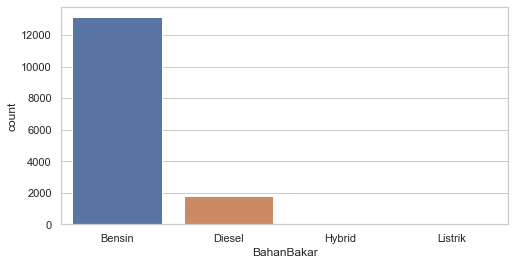

In [513]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,4))
ax = sns.countplot(x="BahanBakar", data=data, order = data['BahanBakar'].value_counts().index)
plt.show()

In [514]:
data['KapasitasMesin'].value_counts()

>1.000 - 1.500 cc    6056
>2.000 - 3.000 cc    2971
>1.500 - 2.000 cc    2490
<1.000 cc             437
>3.000 cc             418
Name: KapasitasMesin, dtype: int64

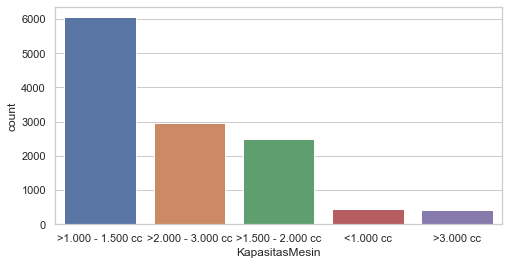

In [515]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="KapasitasMesin", data=data, order = data['KapasitasMesin'].value_counts().index)
plt.show()

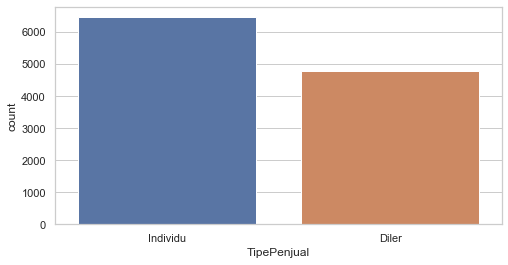

In [516]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="TipePenjual", data=data)
plt.show()

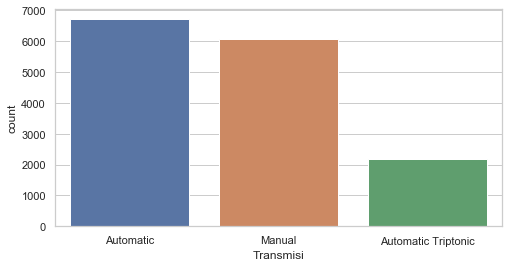

In [517]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="Transmisi", data=data, order = data['Transmisi'].value_counts().index)
plt.show()

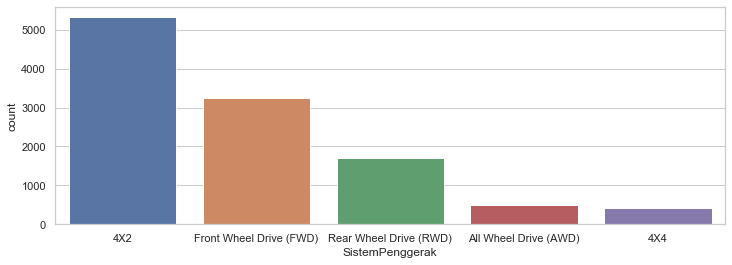

In [518]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="SistemPenggerak", data=data, order = data['SistemPenggerak'].value_counts().index)
plt.show()

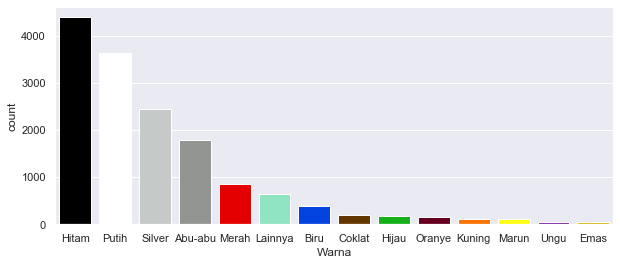

In [519]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,4))
colors = ["black", "white", "silver", "grey", "red", "light teal", "blue", "brown", "green", "maroon", "orange", "yellow", "purple", "gold"]
ax = sns.countplot(x="Warna", data=data, order = data['Warna'].value_counts().index, palette=sns.xkcd_palette(colors), saturation=1)
plt.show()

In [520]:
data['dihighlight'] = data['dihighlight'].notnull()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14951 entries, 0 to 14950
Data columns (total 21 columns):
BahanBakar         14951 non-null object
FiturTambahan      10235 non-null object
Harga              14951 non-null object
JarakTempuh        14951 non-null object
KapasitasMesin     12372 non-null object
Lokasi             14951 non-null object
Merek              14951 non-null object
Model              14951 non-null object
NamaBursaMobil     2436 non-null object
NamaPenjual        14951 non-null object
SistemPenggerak    11179 non-null object
Tahun              14951 non-null object
TanggalAnggota     14951 non-null object
TanggalJual        14951 non-null object
TipeBodi           11943 non-null object
TipePenjual        11264 non-null object
Transmisi          14951 non-null object
Url                14951 non-null object
Varian             13578 non-null object
Warna              14951 non-null object
dihighlight        14951 non-null bool
dtypes: bool(1), object(20)
memor

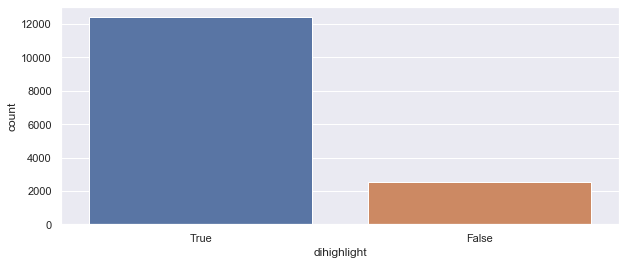

In [521]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x="dihighlight", data=data, order = data['dihighlight'].value_counts().index)
plt.show()

## 3. Data Preprocessing

### 3.1.  Preprocessing Tanggal Penjualan

In [522]:
conversion_month = {"May": "Mei", "Aug": "Agt", "Oct": "Okt", "Dec": "Des"}
tanggal_jual = []
for datas in data['TanggalJual']:
    # ubah 'Hari ini'
    if "Kemarin" in datas:
        tanggal_jual.append(date(2019, 11, 4).strftime("%d %b"))
    
    if "Hari" in datas:
        tanggal_jual.append(date(2019, 11, 5).strftime("%d %b"))
        
    # ubah 'x hari yang lalu'
    elif "hari" in datas:
        day = datas.split()
        d = int(day[0])
        dates = date.today()- dt.timedelta(days=d)
        tanggal_jual.append(dates.strftime("%d %b"))
    
    elif len(datas.split()) > 1:
        if datas.split()[1] in conversion_month:
            tanggal_jual.append(datas.split()[0] + " " + conversion_month[datas.split()[1]])
        else:
            tanggal_jual.append(datas)
    
    else:
        pass
data['TanggalJual'] = tanggal_jual  

### 3.2.  Preprocessing Tanggal Anggota

In [523]:
conversion_month = {"May": "Mei", "Aug": "Agt", "Oct": "Okt", "Dec": "Des"}
tanggal_anggota = []
for datas in data['TanggalAnggota']:
    # ubah 'Hari ini'
    if "Kemarin" in datas:
        tanggal_anggota.append(date(2019, 11, 4).strftime("%b %Y"))
    
    if "Hari" in datas:
        tanggal_anggota.append(date(2019, 11, 5).strftime("%b %Y"))
        
    # ubah 'x hari yang lalu'
    elif "hari" in datas:
        day = datas.split()
        d = int(day[0])
        dates = date.today()- dt.timedelta(days=d)
        tanggal_anggota.append(dates.strftime("%b %Y"))
    
    elif len(datas.split()) > 1:
        if datas.split()[1] in conversion_month:
            tanggal_anggota.append(datas.split()[0] + " " + conversion_month[datas.split()[1]])
        else:
            tanggal_anggota.append(datas)
    
    else:
        pass
data['TanggalAnggota'] = tanggal_anggota

### 3.3.  Feature Engineering

In [524]:
kecamatan = []
kabupaten_kota = []
provinsi = []
lokasi = []
for datas in data['Lokasi']:
    kecamatan.append(datas.split(',')[0])
    kabupaten_kota.append(datas.split(',')[1])
    provinsi.append(datas.split(',')[2])
    lokasi.append(','.join(set(datas.split(','))))
data['Lokasi'] = lokasi
data['Kecamatan'] = kecamatan
data['KabupatenKota'] = kabupaten_kota
data['Provinsi'] = provinsi
data = data.reindex(sorted(data.columns), axis=1)

In [540]:
data[["KabupatenKota", "Kecamatan", "Provinsi"]].describe()

KabupatenKota   Kecamatan         Provinsi
count              14951       14951            14951
unique               200         870               29
top      Jakarta Selatan  Pademangan   Jakarta D.K.I.
freq                1350         721             4888

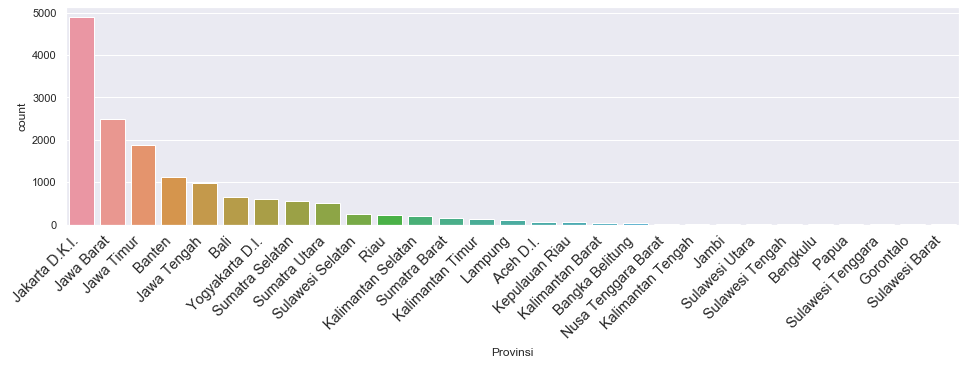

In [550]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x="Provinsi", data=data, order = data['Provinsi'].value_counts().index)
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
plt.show()

### 3.4.  Preprocessing Harga

In [526]:
data['Harga'] = data['Harga'].astype('str').apply(lambda x: x.replace('Rp','')).apply(lambda x: x.replace('.','')).astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14951 entries, 0 to 14950
Data columns (total 24 columns):
BahanBakar         14951 non-null object
FiturTambahan      10235 non-null object
Harga              14951 non-null int64
JarakTempuh        14951 non-null object
KabupatenKota      14951 non-null object
KapasitasMesin     12372 non-null object
Kecamatan          14951 non-null object
Lokasi             14951 non-null object
Merek              14951 non-null object
Model              14951 non-null object
NamaBursaMobil     2436 non-null object
NamaPenjual        14951 non-null object
Provinsi           14951 non-null object
SistemPenggerak    11179 non-null object
Tahun              14951 non-null object
TanggalAnggota     14951 non-null object
TanggalJual        14951 non-null object
TipeBodi           11943 non-null object
TipePenjual        11264 non-null object
Transmisi          14951 non-null object
Url                14951 non-null object
Varian             13578 non-nul

### 3.5. Null/Missing Data Processing

### 3.5.1. Kolom TipePenjual

In [527]:
pd.set_option('display.max_rows', 9650)
columns = ["NamaBursaMobil", "TipePenjual"]
data[columns]

NamaBursaMobil TipePenjual
0                NaN    Individu
1                NaN    Individu
2                NaN         NaN
3                NaN         NaN
4                NaN    Individu
...              ...         ...
14946            NaN         NaN
14947            NaN       Diler
14948            NaN    Individu
14949            NaN    Individu
14950            NaN         NaN

[14951 rows x 2 columns]

In [528]:
data.groupby(['NamaBursaMobil','TipePenjual']).size()

NamaBursaMobil                    TipePenjual
Bursa Gading Auto Center          Diler           48
                                  Individu        38
Bursa Mobil BG Junction Surabaya  Diler            8
                                  Individu         9
Bursa Mobil Bintaro               Diler          224
                                  Individu        11
Bursa Mobil Blok M Plaza          Individu         4
Bursa Mobil Blok M Square         Diler           66
                                  Individu         3
Bursa Mobil DTC                   Diler           98
                                  Individu        22
Bursa Mobil Karawaci              Diler           70
                                  Individu         5
Bursa Mobil Kelapa Gading         Diler           34
                                  Individu         8
Bursa Mobil Lenmarc Surabaya      Diler            2
                                  Individu         7
Bursa Mobil MGK Kemayoran         Diler          128


In [529]:
data.groupby('TipePenjual')['NamaBursaMobil'].apply(lambda x: (x.notnull()).sum()).reset_index(name='count')

TipePenjual  count
0       Diler   1934
1    Individu    368

In [530]:
data.loc[data['TipePenjual'].isnull() & data.NamaBursaMobil.notnull(), 'TipePenjual'] = 'Diler'
data.loc[data.TipePenjual.isnull() & data.NamaBursaMobil.isnull(), 'TipePenjual'] = 'Individu'
data

BahanBakar                                      FiturTambahan  \
0         Bensin                                    Electric Window   
1         Bensin  Jok kulit,Bluetooth Audio,Electric Window,Sens...   
2         Bensin                                                NaN   
3         Bensin  Airbag,Bluetooth Audio,Electric Window,Jok kul...   
4         Bensin                                                NaN   
...          ...                                                ...   
14946     Bensin                      Bluetooth Audio,GPS,Jok kulit   
14947     Bensin                                                NaN   
14948     Bensin  GPS,Jok kulit,Sensor Parkir,Airbag,Electric Wi...   
14949     Bensin  Airbag,Bluetooth Audio,Electric Window,Sensor ...   
14950     Diesel  Jok kulit,Bluetooth Audio,Sensor Parkir,Electr...   

           Harga         JarakTempuh      KabupatenKota     KapasitasMesin  \
0       30000000  160.000-165.000 km        Kolaka Kab.  >1.000 - 1.500 cc   
1       37000000  230.000-235.000 km     Pekanbaru Kota  >1.000 - 1.500 cc   
2       55000000    85.000-90.000 km   Kulon Progo Kab.          <1.000 cc   
3      153000000  105.000-110.000 km     Palembang Kota  >1.000 - 1.500 cc   
4      232000000    20.000-25.000 km      Surabaya Kota  >1.000 - 1.500 cc   
...          ...                 ...                ...                ...   
14946   83000000    25.000-30.000 km      Surabaya Kota  >1.000 - 1.500 cc   
14947   99999000    85.000-90.000 km     Tangerang Kota  >1.000 - 1.500 cc   
14948  400000000    55.000-60.000 km      Jakarta Pusat  >2.000 - 3.000 cc   
14949   87500000    60.000-65.000 km       Kebumen Kab.  >1.000 - 1.500 cc   
14950  250000000    40.000-45.000 km      Semarang Kota  >2.000 - 3.000 cc   

            Kecamatan                                         Lokasi  \
0           Wundulako      Wundulako, Kolaka Kab., Sulawesi Tenggara   
1      Pekanbaru Kota            Pekanbaru Kota,Pekanbaru Kota, Riau   
2           Girimulyo    Yogyakarta D.I.,Girimulyo, Kulon Progo Kab.   
3        Ilir Barat I  Ilir Barat I, Palembang Kota, Sumatra Selatan   
4           Wonokromo           Wonokromo, Jawa Timur, Surabaya Kota   
...               ...                                            ...   
14946      Tambaksari           Surabaya Kota, Jawa Timur,Tambaksari   
14947        Karawaci               Karawaci, Banten, Tangerang Kota   
14948         Menteng          Jakarta D.K.I.,Menteng, Jakarta Pusat   
14949         Kebumen              Kebumen Kab., Jawa Tengah,Kebumen   
14950  Semarang Barat     Semarang Barat, Semarang Kota, Jawa Tengah   

            Merek             Model  ... Tahun TanggalAnggota TanggalJual  \
0           Chery                QQ  ...  2009       Jun 2015      05 Nov   
1          Toyota           Starlet  ...  1994       Nov 2019      05 Nov   
2        Daihatsu             Xenia  ...  2008       Nov 2019      05 Nov   
3           Honda              Jazz  ...  2014       Jun 2018      27 Okt   
4           Honda              HR-V  ...  2015       Apr 2018       4 Okt   
...           ...               ...  ...   ...            ...         ...   
14946    Daihatsu  Gran max Pick-up  ...  2016       Okt 2018      21 Okt   
14947    Daihatsu            Terios  ...  2010       Apr 2017      01 Nov   
14948         BMW           Serie 3  ...  2014       Jun 2011      05 Nov   
14949      Suzuki               SX4  ...  2009       Des 2014      28 Okt   
14950  Mitsubishi      Pajero Sport  ...  2011       Jul 2019      31 Oct   

                 TipeBodi TipePenjual            Transmisi  \
0      Compact & City Car    Individu               Manual   
1                   Sedan    Individu               Manual   
2                 Minibus    Individu               Manual   
3      Compact & City Car    Individu               Manual   
4                     NaN    Individu  Automatic Triptonic   
...                   ...         ...                 

### 3.6. Pemisahan Input dan Target Data

In [531]:
# Define input data (x)
x_data = copy.deepcopy(data)
x_data.drop('Harga', axis=1, inplace=True)

# Define target data (y)
y_data = copy.deepcopy(data['Harga'])

# Split training-test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [532]:
x_train

BahanBakar                                      FiturTambahan  \
5478      Bensin  Airbag,Bluetooth Audio,Electric Window,GPS,Jok...   
13894     Bensin               Airbag,Electric Window,Sensor Parkir   
2553      Bensin  Kamera Belakang,Bluetooth Audio,Sensor Parkir,...   
8915      Diesel  Airbag,Bluetooth Audio,Electric Window,GPS,Jok...   
14097     Bensin  Airbag,Bluetooth Audio,Electric Window,Kamera ...   
...          ...                                                ...   
7299      Bensin  Airbag,Bluetooth Audio,Electric Window,GPS,Jok...   
6219      Bensin  Airbag,Bluetooth Audio,Electric Window,Jok kul...   
13122     Diesel  Kamera Belakang,Bluetooth Audio,Sensor Parkir,...   
9490      Bensin               Airbag,Electric Window,Sensor Parkir   
569       Bensin  Airbag,Bluetooth Audio,Electric Window,Jok kul...   

              JarakTempuh     KabupatenKota     KapasitasMesin  \
5478     60.000-65.000 km     Jakarta Utara  >1.500 - 2.000 cc   
13894    15.000-20.000 km    Palembang Kota  >1.000 - 1.500 cc   
2553           0-5.000 km     Surabaya Kota  >1.500 - 2.000 cc   
8915   105.000-110.000 km   Jakarta Selatan  >2.000 - 3.000 cc   
14097    40.000-45.000 km     Denpasar Kota  >1.000 - 1.500 cc   
...                   ...               ...                ...   
7299     30.000-35.000 km     Jakarta Utara  >1.000 - 1.500 cc   
6219     65.000-70.000 km     Semarang Kota  >1.000 - 1.500 cc   
13122    20.000-25.000 km     Jakarta Barat  >2.000 - 3.000 cc   
9490     75.000-80.000 km     Jakarta Barat  >1.500 - 2.000 cc   
569      10.000-15.000 km    Palembang Kota  >1.000 - 1.500 cc   

             Kecamatan                                        Lokasi  \
5478        Pademangan      Jakarta D.K.I., Jakarta Utara,Pademangan   
13894         Kemuning      Palembang Kota,Kemuning, Sumatra Selatan   
2553       Gununganyar         Surabaya Kota,Gununganyar, Jawa Timur   
8915             Tebet         Jakarta Selatan, Jakarta D.K.I.,Tebet   
14097   Denpasar Barat           Denpasar Barat, Bali, Denpasar Kota   
...                ...                                           ...   
7299        Pademangan      Jakarta D.K.I., Jakarta Utara,Pademangan   
6219   Semarang Tengah    Semarang Kota,Semarang Tengah, Jawa Tengah   
13122      Kebon Jeruk     Jakarta D.K.I.,Kebon Jeruk, Jakarta Barat   
9490       Kebon Jeruk     Jakarta D.K.I.,Kebon Jeruk, Jakarta Barat   
569        Bukit Kecil   Palembang Kota,Bukit Kecil, Sumatra Selatan   

            Merek      Model              NamaBursaMobil  ... Tahun  \
5478   Mitsubishi  Outlander  Bursa Mobil WTC Mangga Dua  ...  2014   
13894      Datsun         Go                         NaN  ...  2017   
2553       Toyota     Innova                         NaN  ...  2005   
8915       Nissan     Navara                         NaN  ...  2012   
14097      Toyota      Yaris                         NaN  ...  2015   
...           ...        ...                         ...  ...   ...   
7299       Nissan     Livina  Bursa Mobil WTC Mangga Dua  ...  2016   
6219       Toyota     Avanza          Carsentro Semarang  ...  2015   
13122      Toyota   Fortuner                         NaN  ...  2016   
9490       Toyota      Yaris                         NaN  ...  2010   
569        Toyota      Calya                         NaN  ...  2018   

      TanggalAnggota TanggalJual            TipeBodi TipePenjual  \
5478        Okt 2012      01 Nov                 SUV       Diler   
13894       Jan 2015      04 Nov           Hatchback       Diler   
2553        Des 2012      26 Okt                 MPV    Individu   
8915        Apr 2015      24 Okt        Double Cabin       Diler   
14097       Okt 2014      05 Nov           Hatchback    Individu   
...              ...         ...                 ...         ...   
7299        Sep 2017      01 Nov                 MPV       Diler   
6219        Okt 2016       5 Okt                 MPV       Diler   
13122       Mei 2014      03 N

In [533]:
y_train

5478     183000000
13894     80500000
2553     106000000
8915     225000000
14097    175000000
           ...    
7299     149000000
6219     133000000
13122    405000000
9490     103000000
569      119000000
Name: Harga, Length: 11960, dtype: int64

In [534]:
x_test

BahanBakar                                      FiturTambahan  \
3411      Bensin                                                NaN   
5031      Bensin                                                NaN   
11950     Bensin                                                NaN   
10071     Bensin                                                NaN   
7914      Bensin     Airbag,Electric Window,Jok kulit,Sensor Parkir   
7307      Bensin               Sensor Parkir,Airbag,Electric Window   
6122      Bensin  Airbag,Bluetooth Audio,Electric Window,Kamera ...   
3838      Bensin                                                NaN   
8799      Bensin  Bluetooth Audio,Kamera Belakang,Jok kulit,Elec...   
5139      Bensin          Bluetooth Audio,Electric Window,Jok kulit   
4637      Diesel           Airbag,Electric Window,GPS,Sensor Parkir   
459       Bensin  Airbag,Bluetooth Audio,Electric Window,GPS,Jok...   
948       Bensin                                                NaN   
6957      Bensin                                                NaN   
13740     Bensin  Bluetooth Audio,Electric Window,GPS,Jok kulit,...   
14588     Bensin                                                NaN   
11503     Bensin     Jok kulit,Sensor Parkir,Airbag,Electric Window   
12828     Bensin  Bluetooth Audio,Airbag,Sunroof,Moonroof,Sensor...   
5366      Bensin  Bluetooth Audio,Electric Window,Kamera Belakan...   
4646      Bensin  Airbag,Bluetooth Audio,Electric Window,Jok kul...   
5365      Bensin                    Bluetooth Audio,Electric Window   
11000     Bensin                                                NaN   
5446      Bensin                                                NaN   
9374      Bensin  Bluetooth Audio,Airbag,Sensor Parkir,Electric ...   
7950      Bensin                          Electric Window,Jok kulit   
13370     Bensin  Airbag,Bluetooth Audio,Sensor Parkir,Electric ...   
13765     Bensin  Airbag,Bluetooth Audio,Electric Window,GPS,Kam...   
920       Bensin  Sensor Parkir,GPS,Bluetooth Audio,Electric Win...   
3262      Bensin                                                NaN   
9311      Bensin  Airbag,Bluetooth Audio,Electric Window,Kamera ...   
5831      Bensin                                                NaN   
1753      Bensin                                             Airbag   
1152      Bensin                                                NaN   
11582     Diesel                                                NaN   
5347      Bensin                                          Jok kulit   
14924     Bensin                                                NaN   
11521     Bensin  Airbag,Bluetooth Audio,Electric Window,Sensor ...   
1568      Bensin                                                NaN   
14874     Bensin                             Airbag,Electric Window   
10340     Bensin                                                NaN   
6694      Bensin                                                NaN   
9258      Bensin                                                NaN   
5513      Bensin                   Airbag,Electric Window,Jok kulit   
8025      Bensin  Jok kulit,Kamera Belakang,Bluetooth Audio,Sens...   
13477     Bensin  Airbag,Bluetooth Audio,Electric Window,Sensor ...   
8505      Bensin  Airbag,Bluetooth Audio,Electric Window,GPS,Jok...   
8737      Bensin                                                NaN   
8950      Bensin                   Airbag,Electric Window,Jok kulit   
2619      Bensin                                    Electric Window   
11791     Bensin                             Airbag,Electric Window   
9063      Bensin                                                NaN   
13448     Diesel                             Airbag,Electric Window   
8277      Bensin  Bluetooth Audio,Airbag,Kamera Belakang,Jok kul...   
10922     Bensin               Airbag,Bluetooth Audio,Sensor Parkir   
2819      Diesel  Airbag,Bluetooth Audio,Electric Window,Sensor ...   
8652      Bensin     Airbag,El

In [535]:
y_test

3411       105000000
5031       210000000
11950      114100000
10071      158000000
7914       125000000
7307       167500000
6122       196350000
3838       255000000
8799       230000000
5139        63000000
4637       230000000
459        302500000
948         35000000
6957       135000000
13740       92000000
14588      118000000
11503       95000000
12828      375000000
5366       135000000
4646       209000000
5365        74000000
11000      138000000
5446       110000000
9374       163000000
7950        75000000
13370      140000000
13765      165000000
920        165000000
3262       124000000
9311       228000000
5831        91500000
1753       175000000
1152       470650000
11582      519500000
5347       156000000
14924      115000000
11521      139000000
1568       149000000
14874      105000000
10340       79000000
6694       102350000
9258       181125000
5513        53000000
8025       145000000
13477      128000000
8505       110000000
8737        58500000
8950        8

### 3.7. Ubah menjadi Category

In [536]:
columns = list(x_data)
x_data[columns] = x_data[columns].astype('category')
x_data.info

<bound method DataFrame.info of       BahanBakar                                      FiturTambahan  \
0         Bensin                                    Electric Window   
1         Bensin  Jok kulit,Bluetooth Audio,Electric Window,Sens...   
2         Bensin                                                NaN   
3         Bensin  Airbag,Bluetooth Audio,Electric Window,Jok kul...   
4         Bensin                                                NaN   
...          ...                                                ...   
14946     Bensin                      Bluetooth Audio,GPS,Jok kulit   
14947     Bensin                                                NaN   
14948     Bensin  GPS,Jok kulit,Sensor Parkir,Airbag,Electric Wi...   
14949     Bensin  Airbag,Bluetooth Audio,Electric Window,Sensor ...   
14950     Diesel  Jok kulit,Bluetooth Audio,Sensor Parkir,Electr...   

              JarakTempuh      KabupatenKota     KapasitasMesin  \
0      160.000-165.000 km        Kolaka Kab.  >1

### 3.8. Scaling

### 3.9. Normalization

### 3.10. Feature Selection

In [537]:
# Correlation Matrix
train = x_train.join(y_train)
correlation = train.corr(method ='pearson')

In [538]:
# Drop Features based on Correlation Result

## 4. Regression Model Creation

## 5. Model Evaluation